# **Introducción a PyTorch**

PyTorch es una biblioteca de código abierto desarrollada por Facebook para computación numérica y aprendizaje automático. Proporciona una plataforma flexible y eficiente para construir y entrenar modelos de aprendizaje automático y redes neuronales profundas.

A continuación, se presenta un tutorial paso a paso que cubre las características destacables de PyTorch, desde la creación de tensores hasta el entrenamiento de modelos.

## **1. Creación de Tensores**

Los tensores son la estructura de datos básica en PyTorch. Pueden ser escalares, vectores, matrices o tensores de dimensiones superiores.

In [1]:
import torch

# Escalar (tensor de cero dimensiones)
escalar = torch.tensor(7)
print("Escalar:", escalar)

# Vector (tensor de una dimensión)
vector = torch.tensor([1.0, 2.0, 3.0])
print("Vector:", vector)

# Matriz (tensor de dos dimensiones)
matriz = torch.tensor([[1, 2], [3, 4]])
print("Matriz:", matriz)

# Tensor de dimensiones superiores
tensor = torch.tensor([[[1, 2], [3, 4]], [[5, 6], [7, 8]]])
print("Tensor:", tensor)

Escalar: tensor(7)
Vector: tensor([1., 2., 3.])
Matriz: tensor([[1, 2],
        [3, 4]])
Tensor: tensor([[[1, 2],
         [3, 4]],

        [[5, 6],
         [7, 8]]])



## **2. Operaciones Básicas con Tensores**

Puedes realizar operaciones matemáticas con tensores, como suma, resta, multiplicación, etc.

In [2]:
a = torch.tensor([1, 2, 3])
b = torch.tensor([4, 5, 6])

# Suma
suma = torch.add(a, b)
print("Suma:", suma)

# Multiplicación
a = torch.tensor([1, 2, 3])
b = torch.tensor([4, 5, 6])
multiplicacion = torch.mul(a, b)
print("Multiplicación:", multiplicacion)

# Producto matricial
matriz1 = torch.tensor([[1, 2], [3, 4]])
matriz2 = torch.tensor([[5, 6], [7, 8]])
producto = torch.matmul(matriz1, matriz2)
print("Producto Matricial:", producto)

Suma: tensor([5, 7, 9])
Multiplicación: tensor([ 4, 10, 18])
Producto Matricial: tensor([[19, 22],
        [43, 50]])



## **3. Gradientes y Auto-Diferenciación**

PyTorch permite calcular gradientes automáticamente utilizando `torch.autograd`. Esto es útil para el entrenamiento de modelos mediante optimización basada en gradientes.

In [3]:
# Definimos una variable
x = torch.tensor(3.0, requires_grad=True)

# Calculamos la función para la cual queremos el gradiente
y = x ** 2

# Calculamos el gradiente de y respecto a x
y.backward()
print("El gradiente de y respecto a x en x=3.0 es:", x.grad)

El gradiente de y respecto a x en x=3.0 es: tensor(6.)


## **4. Construcción de un Modelo de Regresión Lineal**

Ahora, veamos un ejemplo completo de cómo construir y entrenar un modelo sencillo usando PyTorch: una regresión lineal.

In [4]:
import torch
import numpy as np

# Generamos datos de ejemplo
# y = 2x + 1 + ruido
X = np.linspace(0, 10, 100)
ruido = np.random.randn(*X.shape) * 0.5
Y = 2 * X + 1 + ruido

# Convertimos los datos a tensores
X = torch.tensor(X, dtype=torch.float32).view(-1, 1)
Y = torch.tensor(Y, dtype=torch.float32).view(-1, 1)

# Definimos el modelo lineal
W = torch.randn(1, requires_grad=True)
b = torch.randn(1, requires_grad=True)

# Definimos el número de épocas y la tasa de aprendizaje
epochs = 100
learning_rate = 0.01

# Entrenamiento del modelo
for epoch in range(epochs):
    # Calculamos las predicciones
    Y_pred = W * X + b
    # Calculamos el error (función de pérdida)
    loss = torch.mean((Y - Y_pred) ** 2)
    # Calculamos los gradientes
    loss.backward()
    # Actualizamos los parámetros
    with torch.no_grad():
        W -= learning_rate * W.grad
        b -= learning_rate * b.grad
    # Vaciamos los gradientes
    W.grad.zero_()
    b.grad.zero_()

    if (epoch+1) % 10 == 0:
        print(f"Epoch {epoch+1}: pérdida = {loss.item()}, W = {W.item()}, b = {b.item()}")

print(f"\nModelo entrenado: Y = {W.item()} * X + {b.item()}")

Epoch 10: pérdida = 0.2644321620464325, W = 2.0474979877471924, b = 0.599180281162262
Epoch 20: pérdida = 0.25669920444488525, W = 2.043412685394287, b = 0.6265784502029419
Epoch 30: pérdida = 0.2496991753578186, W = 2.0394937992095947, b = 0.652641773223877
Epoch 40: pérdida = 0.24336214363574982, W = 2.0357649326324463, b = 0.6774399876594543
Epoch 50: pérdida = 0.2376256138086319, W = 2.032217264175415, b = 0.7010341882705688
Epoch 60: pérdida = 0.23243264853954315, W = 2.028841972351074, b = 0.7234830856323242
Epoch 70: pérdida = 0.22773140668869019, W = 2.025630474090576, b = 0.744841992855072
Epoch 80: pérdida = 0.22347567975521088, W = 2.0225746631622314, b = 0.7651641964912415
Epoch 90: pérdida = 0.21962308883666992, W = 2.019667387008667, b = 0.7844997644424438
Epoch 100: pérdida = 0.21613530814647675, W = 2.0169012546539307, b = 0.8028967380523682

Modelo entrenado: Y = 2.0169012546539307 * X + 0.8028967380523682


## **5. Uso de PyTorch nn para Construir y Entrenar Modelos**

PyTorch incluye el módulo `torch.nn`, que proporciona una API de alto nivel para construir y entrenar modelos de forma más sencilla.

In [6]:
import torch
import torch.nn as nn
import numpy as np

# Generamos datos de ejemplo
X = np.linspace(0, 10, 100)
ruido = np.random.randn(*X.shape) * 0.5
Y = 2 * X + 1 + ruido

# Convertimos los datos a tensores
X = torch.tensor(X, dtype=torch.float32).view(-1, 1)
Y = torch.tensor(Y, dtype=torch.float32).view(-1, 1)

# Definimos el modelo usando nn
model = nn.Sequential(
    nn.Linear(1, 1)
)

# Definimos la función de pérdida y el optimizador
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

# Entrenamos el modelo
epochs = 100
for epoch in range(epochs):
    # Hacemos una predicción
    Y_pred = model(X)
    # Calculamos la pérdida
    loss = criterion(Y_pred, Y)
    # Retropropagación
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

print(f"\nModelo entrenado: {list(model.parameters())}")


Modelo entrenado: [Parameter containing:
tensor([[2.0473]], requires_grad=True), Parameter containing:
tensor([0.6193], requires_grad=True)]


## **6. Construcción de una Red Neuronal para Clasificación**

Veamos un ejemplo de cómo construir una red neuronal para resolver un problema de clasificación utilizando el conjunto de datos MNIST.

In [7]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Cargamos el conjunto de datos MNIST
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100.0%


Extracting ./data\MNIST\raw\train-images-idx3-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100.0%


Extracting ./data\MNIST\raw\train-labels-idx1-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100.0%


Extracting ./data\MNIST\raw\t10k-images-idx3-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100.0%

Extracting ./data\MNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\MNIST\raw



Tamaño del conjunto de entrenamiento: 60000
Tamaño del conjunto de prueba: 10000


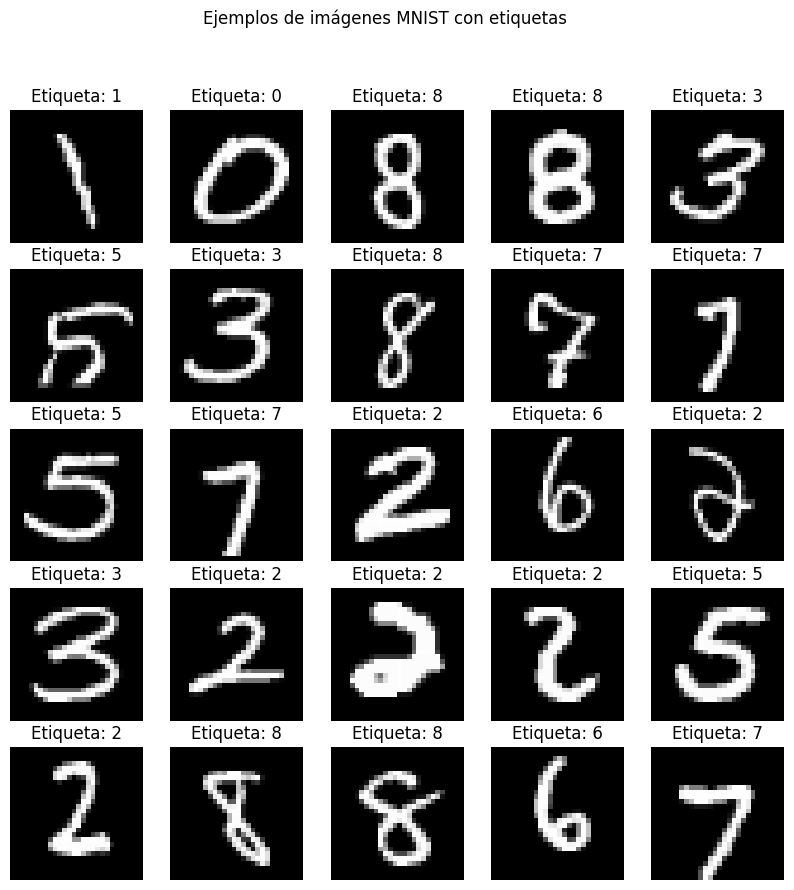

In [9]:
# Mostramos el tamaño de los datasets
print(f"Tamaño del conjunto de entrenamiento: {len(trainset)}")
print(f"Tamaño del conjunto de prueba: {len(testset)}")

# Mostramos una matriz de 5x5 ejemplos de imágenes con sus etiquetas
dataiter = iter(trainloader)
images, labels = next(dataiter)
fig, axes = plt.subplots(5, 5, figsize=(10, 10))
fig.suptitle("Ejemplos de imágenes MNIST con etiquetas")
for i, ax in enumerate(axes.flat):
    ax.imshow(images[i].numpy().squeeze(), cmap='gray')
    ax.set_title(f"Etiqueta: {labels[i].item()}")
    ax.axis('off')
plt.show()

In [10]:
# Construimos el modelo
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.flatten(x)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

model = Net()

# Definimos la función de pérdida y el optimizador
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Entrenamos el modelo
for epoch in range(5):
    for images, labels in trainloader:
        # Hacemos una predicción
        outputs = model(images)
        # Calculamos la pérdida
        loss = criterion(outputs, labels)
        # Retropropagación
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

In [11]:
# Evaluamos el modelo
correct = 0
total = 0
with torch.no_grad():
    for images, labels in testloader:
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"\nPrecisión en test: {100 * correct / total}%")


Precisión en test: 96.18%


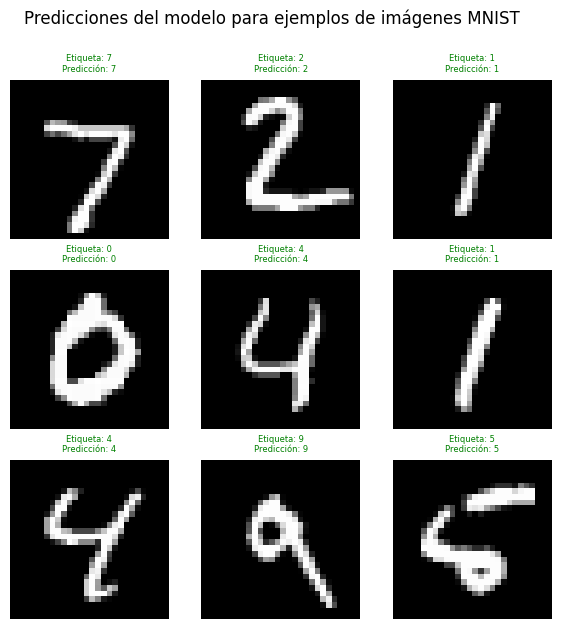

In [14]:
# Probamos el modelo sobre algunos ejemplos de imágenes
dataiter = iter(testloader)
images, labels = next(dataiter)
outputs = model(images)
_, predicted = torch.max(outputs, 1)

fig, axes = plt.subplots(3, 3, figsize=(7, 7))
fig.suptitle("Predicciones del modelo para ejemplos de imágenes MNIST")
for i, ax in enumerate(axes.flat):
    ax.imshow(images[i].numpy().squeeze(), cmap='gray')
    ax.set_title(f"Etiqueta: {labels[i].item()}\nPredicción: {predicted[i].item()}", color='green' if labels[i] == predicted[i] else 'red', fontsize=6)
    ax.axis('off')
plt.show()


## **7. Guardar y Cargar Modelos**

Puedes guardar modelos entrenados para usarlos más tarde o para continuar su entrenamiento.

In [15]:
# Guardamos el modelo
PATH = 'modelo_mnist.pth'
torch.save(model.state_dict(), PATH)

# Cargamos el modelo
modelo_cargado = Net()
modelo_cargado.load_state_dict(torch.load(PATH))
modelo_cargado.eval()

# Verificamos que el modelo cargado funciona correctamente
correct = 0
total = 0
with torch.no_grad():
    for images, labels in testloader:
        outputs = modelo_cargado(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"\nPrecisión del modelo cargado: {100 * correct / total}%")


Precisión del modelo cargado: 96.18%
